# ArviZ migration guide

We have been working on refactoring ArviZ to allow more flexibility and extensibility of its elements
while keeping as much as possible a friendly user-interface that gives sensible results with little to no arguments.

One important change is enhanced modularity. Everything will still be available through a common namespace `arviz`,
but ArviZ will now be composed of 3 smaller libraries:

* [arviz-base](https://arviz-base.readthedocs.io/en/latest/) data related functionality, including converters from different PPLs.
* [arviz-stats](https://arviz-stats.readthedocs.io/en/latest/) for statistical functions and diagnostics.
* [arviz-plots](https://arviz-plots.readthedocs.io/en/latest/) for visual checks built on top of arviz-stats and arviz-base.

Each library depends only on a minimal set of libraries, with a lot of functionality built on top of optional dependencies.
This keeps ArviZ smaller and easier to install as you can install only the components you really need. The main examples are:

* `arviz-base` has no I/O library as a dependency, but you can use `netcdf4`, `h5netcdf` or `zarr` to read and write your data, installing only the one you need.
* `arviz-plots` has no plotting library as a dependency, but it can generate plots with `matplotlib`, `bokeh` or `plotly` if they are installed.

At the time of writing, `arviz-xyz` libraries are independent of the `arviz` library, but `arviz` tries to import the `arviz-xyz` libraries
and exposes all their elements through the `arviz.preview` namespace. In the future, with the ArviZ 1.0 release, the `arviz` namespace will look
like `arviz.preview` looks like today.

We encourage you to try it out and get a head start on the migration!

In [1]:
import arviz.preview as az
# change to import arviz as az after ArviZ 1.0 release

Check all 3 libraries have been exposed correctly:

In [2]:
print(az.info)

arviz_base available, exposing its functions as part of arviz.preview
arviz_stats available, exposing its functions as part of arviz.preview
arviz_plots available, exposing its functions as part of arviz.preview



## `arviz-base`

### `DataTree`
One of the main differences is the `arviz.InferenceData` object doesn't exist any more.
`arviz-base` uses `xarray.DataTree` instead. This is a new data structure in xarray,
so it might still have some rough edges, but it is much more flexible and powerful.
To give some examples, I/O will now be more flexible, and any format supported by
xarray is automatically available to you, no need to add wrappers on top of them within ArviZ.
It is also possible to have arbitrary nesting of variables within groups and subgroups.

:::{important}
Not all the functionality on `xarray.DataTree` will be compatible with ArviZ as it would be too much
work for us to cover and maintain. If there are things you have always wanted to do but
were not possible with `InferenceData` but are now possible with `DataTree` please try
them out, give feedback on them and on desired behaviour for things that still don't work.
After a couple releases the "ArviZverse" will stabilize much more and it might not be
possible to add support for that anymore.
:::

#### I already have `InferenceData` object from an external library
`InferenceData` already has a method to convert it to DataTree.

In [3]:
import arviz as arviz_legacy

In [4]:
idata = arviz_legacy.load_arviz_data("centered_eight")

In [5]:
idata.to_datatree()

<xarray.DataTree>
Group: /
├── Group: /posterior
│       Dimensions:  (chain: 4, draw: 500, school: 8)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           mu       (chain, draw) float64 16kB ...
│           theta    (chain, draw, school) float64 128kB ...
│           tau      (chain, draw) float64 16kB ...
│       Attributes:
│           created_at:                 2022-10-13T14:37:37.315398
│           arviz_version:              0.13.0.dev0
│           inference_library:          pymc
│           inference_library_version:  4.2.2
│           sampling_time:              7.480114936828613
│           tuning_steps:               1000
├── Group: /posterior_predictive
│       Dimensions:  (chain: 4, draw: 500, school: 8)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           obs      (chain, draw, school) float64 128kB ...
│       Attributes:
│           arviz_version:              0.13.0.dev0
│           created_at:                 2022-10-13T14:37:41.460544
│           inference_library:          pymc
│           inference_library_version:  4.2.2
├── Group: /log_likelihood
│       Dimensions:  (chain: 4, draw: 500, school: 8)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           obs      (chain, draw, school) float64 128kB ...
│       Attributes:
│           arviz_version:              0.13.0.dev0
│           created_at:                 2022-10-13T14:37:37.487399
│           inference_library:          pymc
│           inference_library_version:  4.2.2
...
├── Group: /prior_predictive
│       Dimensions:  (chain: 1, draw: 500, school: 8)
│       Coordinates:
│         * chain    (chain) int64 8B 0
│         * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           obs      (chain, draw, school) float64 32kB ...
│       Attributes:
│           arviz_version:              0.13.0.dev0
│           created_at:                 2022-10-13T14:37:26.604969
│           inference_library:          pymc
│           inference_library_version:  4.2.2
├── Group: /observed_data
│       Dimensions:  (school: 8)
│       Coordinates:
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           obs      (school) float64 64B ...
│       Attributes:
│           arviz_version:              0.13.0.dev0
│           created_at:                 2022-10-13T14:37:26.606375
│           inference_library:          pymc
│           inference_library_version:  4.2.2
└── Group: /constant_data
        Dimensions:  (school: 8)
        Coordinates:
          * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
        Data variables:
            scores   (school) float64 64B ...
        Attributes:
            arviz_version:              0.13.0.dev0
            created_at:                 2022-10-13T14:37:26.607471
            inference_library:          pymc
            inference_library_version:  4.2.2

#### What about my existing netcdf/zarr files?
They are still valid. There have been no changes on this end and don't plan to make any.
The only difference is which function handles I/O. There used to be functions
in the main arviz namespace like `arviz.from_zarr` and methods to `InferenceData`
such as `.to_netcdf`. These are now part of xarray itself:

| Function in legacy ArviZ | New equivalent in xarray |
|--------------------------|--------------------------|
| arviz.from_netcdf        | xarray.open_datatree[^1] |
| arviz.from_zarr          | xarray.open_datatree[^1] |
| arviz.to_netcdf          | -                        |
| arviz.to_zarr            | -                        |
| arviz.InferenceData.from_netcdf | -                       |
| arviz.InferenceData.from_zarr   | -                         |
| arviz.InferenceData.to_netcdf   | xarray.DataTree.to_netcdf |
| arviz.InferenceData.to_zarr     | xarray.DataTree.to_zarr     |

[^1]: `open_datatree` takes an `engine` argument. Engines "netcdf4" (default if installed)
    and "h5netcdf" allow reading netCDF4 files. Engine "zarr" should be used to read zarr files.

Here is an example where we store an `InferenceData` as a netcdf then read it
as is through {func}`xarray.open_datatree`

In [6]:
idata.to_netcdf("example.nc")

'example.nc'

In [7]:
from xarray import open_datatree
dt = open_datatree("example.nc")
dt

<xarray.DataTree>
Group: /
├── Group: /posterior
│       Dimensions:  (chain: 4, draw: 500, school: 8)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           mu       (chain, draw) float64 16kB ...
│           theta    (chain, draw, school) float64 128kB ...
│           tau      (chain, draw) float64 16kB ...
│       Attributes:
│           created_at:                 2022-10-13T14:37:37.315398
│           arviz_version:              0.13.0.dev0
│           inference_library:          pymc
│           inference_library_version:  4.2.2
│           sampling_time:              7.480114936828613
│           tuning_steps:               1000
├── Group: /posterior_predictive
│       Dimensions:  (chain: 4, draw: 500, school: 8)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           obs      (chain, draw, school) float64 128kB ...
│       Attributes:
│           arviz_version:              0.13.0.dev0
│           created_at:                 2022-10-13T14:37:41.460544
│           inference_library:          pymc
│           inference_library_version:  4.2.2
├── Group: /log_likelihood
│       Dimensions:  (chain: 4, draw: 500, school: 8)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           obs      (chain, draw, school) float64 128kB ...
│       Attributes:
│           arviz_version:              0.13.0.dev0
│           created_at:                 2022-10-13T14:37:37.487399
│           inference_library:          pymc
│           inference_library_version:  4.2.2
...
├── Group: /prior_predictive
│       Dimensions:  (chain: 1, draw: 500, school: 8)
│       Coordinates:
│         * chain    (chain) int64 8B 0
│         * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           obs      (chain, draw, school) float64 32kB ...
│       Attributes:
│           arviz_version:              0.13.0.dev0
│           created_at:                 2022-10-13T14:37:26.604969
│           inference_library:          pymc
│           inference_library_version:  4.2.2
├── Group: /observed_data
│       Dimensions:  (school: 8)
│       Coordinates:
│         * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
│       Data variables:
│           obs      (school) float64 64B ...
│       Attributes:
│           arviz_version:              0.13.0.dev0
│           created_at:                 2022-10-13T14:37:26.606375
│           inference_library:          pymc
│           inference_library_version:  4.2.2
└── Group: /constant_data
        Dimensions:  (school: 8)
        Coordinates:
          * school   (school) <U16 512B 'Choate' 'Deerfield' ... 'Mt. Hermon'
        Data variables:
            scores   (school) float64 64B ...
        Attributes:
            arviz_version:              0.13.0.dev0
            created_at:                 2022-10-13T14:37:26.607471
            inference_library:          pymc
            inference_library_version:  4.2.2

#### Other key differences
`DataTree` supports an arbitrary level of nesting (as opposed to the exactly 1 level of nesting in
`InferenceData`). Thus, to keep things consistent accessing its groups returns a `DataTree`,
even if it is a leaf group. This means that `dt["posterior"]` will now return a `DataTree`.
In many cases this is irrelevant, but there will be some cases where you'll want the
group as a `Dataset` instead. You can achieve this with `dt["posterior"].dataset`.

There are no changes at the variable/`DataArray` level. Thus, `dt["posterior"]["theta"]` is still
a `DataArray`, accessing its variables is one of the cases where having either `DataTree`
or `Dataset` is irrelevant.

### Enhanced converter flexibility
Were you constantly needing to add an extra axis to your data because it didn't have any `chain` dimension? No more!

In [8]:
import numpy as np
rng = np.random.default_rng()
data = rng.normal(size=1000)

In [9]:
# arviz_legacy.from_dict({"posterior": {"mu": data}}) would fail
# unless you did data[None, :] to add the chain dimension
az.rcParams["data.sample_dims"] = "sample"

In [10]:
dt = az.from_dict({"posterior": {"mu": data}})
dt

<xarray.DataTree>
Group: /
└── Group: /posterior
        Dimensions:  (sample: 1000)
        Coordinates:
          * sample   (sample) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
        Data variables:
            mu       (sample) float64 8kB 0.3567 -0.6054 1.053 ... 0.1447 -0.144 -1.116
        Attributes:
            created_at:                 2025-06-22T15:05:05.570349+00:00
            creation_library:           ArviZ
            creation_library_version:   0.7.0.dev0
            creation_library_language:  Python

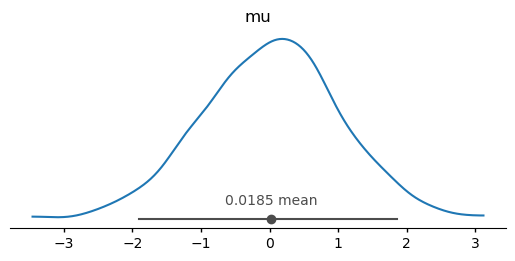

In [11]:
# arviz-stats and arviz-plots also take it into account
az.plot_dist(dt);

:::{note}
It is also possible to modify `sample_dims` through arguments to the different functions.
:::

### New data wrangling features
We have also added multiple functions to help with common data wrangling tasks,
mostly from and to `xarray.Dataset`. For example, you can convert a dataset
to a wide format dataframe with unique combinations of `sample_dims` as its rows,
with {func}`~arviz_base.dataset_to_dataframe`:

In [ ]:
dt = az.load_arviz_data("centered_eight")
az.dataset_to_dataframe(dt.posterior.dataset)

Note it is also aware of ArviZ naming conventions in addition to using
the `sample_dims` `rcParam`. It can be further customized through a `labeller` argument.

:::{tip}
If you want to convert to a long format dataframe, you should use
{meth}`xarray.Dataset.to_dataframe` instead.
:::

## `arviz-stats`

## `arviz-plots`

Out of the 3 libraries, `arviz-plots` is the one with the most changes at all levels, breaking changes, new features more layers to explore.

### More and better supported backends!
One of they key efforts of the refactor has been simplifying the way we interface
with the different plotting backends supported.
arviz-plots has more backends: matplotlib, bokeh and plotly are all supported now,
with (mostly) feature parity among them. All while having less backend related code!

### Plotting function inventory

The following functions have been renamed or restructured:

|   ArviZ <1       |   ArviZ >=1       |
|------------------|-------------------|
| plot_bpv                     | plot_ppc_pit, plot_ppc_tstat     |
| plot_dist_comparison         | plot_prior_posterior             |
| plot_ecdf                    | plot_dist, plot_ecdf_pit         |
| plot_ess                     | plot_ess, plot_ess_evolution     |
| plot_forest                  | plot_forest, plot_ridge          |
| plot_ppc                     | plot_ppc_dist                    |
| plot_posterior, plot_density | plot_dist                        |
| plot_trace                   | plot_trace_dist, plot_trace_rank |

Others have had their code rewritten and their arguments updated to some extent,
but kept the same name:

* plot_autocorr
* plot_compare
* plot_energy
* plot_loo_pit
* plot_mcse
* plot_rank

The following functions have been added:

* {func}`~arviz_plots.plot_convergence_dist`
* {func}`~arviz_plots.plot_pair_focus`
* {func}`~arviz_plots.plot_ppc_pava`
* {func}`~arviz_plots.plot_ppc_rootogram`
* {func}`~arviz_plots.plot_psense_dist`
* {func}`~arviz_plots.plot_psense_quantities`
* {func}`~arviz_plots.plot_trace`

Some functions have been removed and we don't plan to add them:

* plot_dist
* plot_kde

And there are also functions we plan to add but aren't available yet.

* plot_elpd
* plot_khat
* plot_pair
* plot_parallel
* plot_ppc_censored
* plot_ppc_residuals
* plot_violin
* plot_ts
* plot_lm

:::{note}
For now, the documentation for arviz-plots defaults to `latest` which is built
from GitHub with each commit. If you see some of the functions in the last block already
on the example gallery you should be able to try them, but only if you install
the development version! See {ref}`arviz_docs:installation`
:::

You can see all of them at the {ref}`arviz-plots gallery <arviz_plots:example_gallery>`.

### What to expect from the new plotting functions

There are two main differences with the plotting functions here in legacy ArviZ:

1. The return type
2. The way of forwarding arguments to the plotting backends.

Other than that, some arguments have been renamed or gotten different defaults,
but nothing major.

#### New return type: `PlotCollection`

#### kwarg forwarding

### Other arviz-plots features